In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib
%matplotlib inline
from matplotlib import pylab as plt
import multiprocessing as mp

In [2]:
N = 500
nl = 7
p_a = 0.31 # shopper arrival
p_c = 0.8 # checkout

In [3]:
# time vector
time = np.arange(N)
# pre calculate arrivals
# limited to [0,1] per time interval
p_arrive = np.ones((N,), dtype=int)*(np.random.random_sample((N,)) > p_a)
# check out lines
lines = np.arange(nl)

In [4]:
# pre calculate the random search order for every time step for up to all lines
# some of these orders will not be used
d = nl
lines_ar = np.zeros((N, d), dtype=int)
for i in range(N):
    np.random.shuffle(lines)
    lines_ar[i] = lines[:d]
lines_ar

def choose_line(lines, indexes, n_checks):
    a = np.take(lines, indexes)[:n_checks]
    i = np.amin(a)
    return indexes[i]

assert(1 == choose_line(np.array([1,2,3,4,5]),
                        np.array([0,1,2,3,4]),5))
assert(1 == choose_line(np.array([1,2,3,4,5]),
                        np.array([0,1,2,3,4]),1))
assert(4 == choose_line(np.array([4,5,1,2,3]),
                        np.array([0,1,2,3,4]),1))
assert(4 == choose_line(np.array([5,4,3,2,1]),
                        np.array([0,1,2,3,4]),2))
assert(3 == choose_line(np.array([5,4,3,2,1]),
                        np.array([0,1,2,3,4]),3))
assert(1 == choose_line(np.array([5,4,3,2,1]),
                        np.array([0,1,4,2,3]),3))

In [5]:
lines_ar

array([[1, 2, 3, ..., 6, 4, 5],
       [6, 2, 0, ..., 3, 1, 4],
       [6, 5, 0, ..., 2, 4, 3],
       ...,
       [4, 6, 5, ..., 1, 2, 3],
       [3, 1, 0, ..., 6, 4, 5],
       [6, 1, 4, ..., 0, 3, 2]])

In [6]:
# pre calculate checkout
# some of these probabilities will not be used
# (no one in line)
p_checkout = np.ones((N,nl), dtype=int)*(np.random.random_sample((N,nl)) > p_c)

In [7]:
p_checkout

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
data = {d:[] for d in range(1, nl+1)}
for d in range(1, nl+1):
    print("check {} lines".format(d))
    store_lines = np.zeros((N, nl), dtype=int)
    for i in range(1,N):
        store_lines[i] = store_lines[i-1]
       
        checkout = p_checkout[i]*(store_lines[i] > 0)
        store_lines[i] = store_lines[i] - checkout

        if p_arrive[i-1]:
            z = choose_line(store_lines[i-1], lines_ar[i], d)
            store_lines[i][z] = store_lines[i-1][z] + 1
            
        cil = np.sum(store_lines[i])
        data[d].append(cil)
        
        print("{} - line".format(store_lines[i]))
        print("customers in store = {}".format(cil))

check 1 lines
[0 0 0 0 0 0 0] - line
customers in store = 0
[0 0 0 0 0 0 1] - line
customers in store = 1
[0 0 0 0 1 0 1] - line
customers in store = 2
[0 0 0 0 1 0 0] - line
customers in store = 1
[0 1 0 0 1 0 0] - line
customers in store = 2
[0 1 1 0 1 0 0] - line
customers in store = 3
[0 1 0 0 0 0 1] - line
customers in store = 2
[1 1 0 0 0 0 0] - line
customers in store = 2
[1 0 0 0 0 0 0] - line
customers in store = 1
[0 0 0 0 1 0 0] - line
customers in store = 1
[0 0 1 0 1 0 0] - line
customers in store = 2
[0 0 0 1 1 0 0] - line
customers in store = 2
[0 0 0 0 1 0 1] - line
customers in store = 2
[0 0 1 0 1 0 1] - line
customers in store = 3
[0 0 1 0 2 0 1] - line
customers in store = 4
[0 0 0 0 2 0 1] - line
customers in store = 3
[0 0 0 0 2 0 0] - line
customers in store = 2
[0 0 0 0 1 1 0] - line
customers in store = 2
[0 0 1 0 0 1 0] - line
customers in store = 2
[0 0 1 1 0 1 0] - line
customers in store = 3
[0 1 1 0 0 0 0] - line
customers in store = 2
[0 1 1 1 0 0 0] - li

[0 3 1 0 1 0 3] - line
customers in store = 8
[0 2 1 0 1 0 3] - line
customers in store = 7
[1 2 0 0 1 0 3] - line
customers in store = 7
[0 2 0 0 1 1 3] - line
customers in store = 7
[0 2 1 0 1 1 2] - line
customers in store = 7
[1 2 1 0 1 0 1] - line
customers in store = 6
[1 2 1 0 1 0 0] - line
customers in store = 5
[1 2 1 1 1 0 0] - line
customers in store = 6
[1 2 1 1 1 1 0] - line
customers in store = 7
[1 2 2 1 1 0 0] - line
customers in store = 7
[1 1 2 0 1 0 0] - line
customers in store = 5
[1 0 2 0 0 0 0] - line
customers in store = 3
[1 0 2 0 0 0 0] - line
customers in store = 3
[1 0 2 0 0 0 0] - line
customers in store = 3
[1 0 1 0 0 0 0] - line
customers in store = 2
[1 0 0 0 0 1 0] - line
customers in store = 2
[1 0 0 0 1 0 0] - line
customers in store = 2
[0 0 0 0 2 0 0] - line
customers in store = 2
[0 0 1 0 2 0 0] - line
customers in store = 3
[0 0 2 0 2 0 0] - line
customers in store = 4
[0 1 2 0 2 0 0] - line
customers in store = 5
[0 1 2 0 2 0 0] - line
customers i

[0 3 1 0 1 0 2] - line
customers in store = 7
[0 2 1 0 1 0 2] - line
customers in store = 6
[0 3 0 0 1 0 2] - line
customers in store = 6
[0 3 0 0 1 1 2] - line
customers in store = 7
[0 4 0 0 1 1 1] - line
customers in store = 7
[1 4 0 0 1 0 0] - line
customers in store = 6
[1 4 0 0 1 0 0] - line
customers in store = 6
[1 4 0 1 1 0 0] - line
customers in store = 7
[1 4 0 1 1 1 0] - line
customers in store = 8
[1 4 0 1 2 0 0] - line
customers in store = 8
[1 3 0 0 2 0 0] - line
customers in store = 6
[1 2 0 0 1 0 0] - line
customers in store = 4
[1 1 0 0 1 0 0] - line
customers in store = 3
[1 1 0 0 1 0 0] - line
customers in store = 3
[1 1 0 0 1 0 0] - line
customers in store = 3
[1 1 0 0 1 1 0] - line
customers in store = 4
[1 1 0 0 2 0 0] - line
customers in store = 4
[0 1 0 0 3 0 0] - line
customers in store = 4
[0 0 1 0 3 0 0] - line
customers in store = 4
[0 0 0 0 4 0 0] - line
customers in store = 4
[0 1 0 0 4 0 0] - line
customers in store = 5
[0 1 0 0 4 0 0] - line
customers i

customers in store = 5
[0 0 1 0 1 0 2] - line
customers in store = 4
[0 1 0 0 1 0 2] - line
customers in store = 4
[0 1 0 0 1 1 2] - line
customers in store = 5
[0 2 0 0 1 1 1] - line
customers in store = 5
[1 2 0 0 1 0 0] - line
customers in store = 4
[1 2 0 0 1 0 0] - line
customers in store = 4
[1 2 0 1 1 0 0] - line
customers in store = 5
[1 2 0 1 1 1 0] - line
customers in store = 6
[1 2 0 1 2 0 0] - line
customers in store = 6
[1 1 0 0 2 0 0] - line
customers in store = 4
[1 0 0 0 1 0 0] - line
customers in store = 2
[1 0 0 0 1 0 0] - line
customers in store = 2
[1 0 0 0 1 0 0] - line
customers in store = 2
[1 0 0 0 1 0 0] - line
customers in store = 2
[1 0 0 0 1 1 0] - line
customers in store = 3
[1 0 0 0 2 0 0] - line
customers in store = 3
[0 0 0 0 3 0 0] - line
customers in store = 3
[0 0 1 0 3 0 0] - line
customers in store = 4
[0 0 0 0 4 0 0] - line
customers in store = 4
[0 1 0 0 4 0 0] - line
customers in store = 5
[0 1 0 0 4 0 0] - line
customers in store = 5
[0 1 0 0 5 

[2 0 2 1 0 0 0] - line
customers in store = 5
[2 0 2 1 1 0 0] - line
customers in store = 6
[2 0 1 1 1 0 0] - line
customers in store = 5
[2 0 1 1 0 0 0] - line
customers in store = 4
[2 0 0 1 0 0 0] - line
customers in store = 3
[2 0 0 0 0 1 0] - line
customers in store = 3
[2 0 1 0 0 1 0] - line
customers in store = 4
[2 0 1 0 0 0 0] - line
customers in store = 3
[2 0 1 0 1 0 0] - line
customers in store = 4
[2 0 1 0 1 0 0] - line
customers in store = 4
[2 0 1 1 1 0 0] - line
customers in store = 5
[2 0 1 0 2 0 0] - line
customers in store = 5
[1 1 1 0 2 0 0] - line
customers in store = 5
[1 1 1 0 2 0 0] - line
customers in store = 5
[1 1 1 0 1 0 0] - line
customers in store = 4
[1 1 1 0 1 0 0] - line
customers in store = 4
[2 0 1 0 0 0 0] - line
customers in store = 3
[2 1 1 0 0 0 0] - line
customers in store = 4
[2 1 1 0 0 0 0] - line
customers in store = 4
[2 1 1 0 0 0 0] - line
customers in store = 4
[2 1 0 0 0 0 0] - line
customers in store = 3
[2 0 0 0 0 0 0] - line
customers i

[2 1 0 2 0 0 1] - line
customers in store = 6
[1 1 0 2 1 0 1] - line
customers in store = 6
[1 1 0 2 0 1 1] - line
customers in store = 6
[0 1 1 2 0 0 1] - line
customers in store = 5
[0 0 0 3 0 0 1] - line
customers in store = 4
[0 0 0 3 0 1 1] - line
customers in store = 5
[0 0 0 3 0 2 1] - line
customers in store = 6
[0 0 0 4 0 1 1] - line
customers in store = 6
[0 0 0 4 0 2 0] - line
customers in store = 6
[0 1 0 4 0 1 0] - line
customers in store = 6
[0 2 0 4 0 1 0] - line
customers in store = 7
[0 2 0 4 1 1 0] - line
customers in store = 8
[0 2 0 4 0 1 0] - line
customers in store = 7
[0 3 0 4 0 0 0] - line
customers in store = 7
[0 3 1 4 0 0 0] - line
customers in store = 8
[0 3 1 4 0 0 0] - line
customers in store = 8
[0 3 1 4 0 0 0] - line
customers in store = 8
[0 2 1 5 0 0 0] - line
customers in store = 8
[0 2 1 4 1 0 0] - line
customers in store = 8
[0 2 1 4 1 0 0] - line
customers in store = 8
[0 2 0 5 1 0 0] - line
customers in store = 8
[0 2 0 5 0 0 0] - line
customers i

[0 0 0 0 4 0 2] - line
customers in store = 6
[0 0 0 0 4 1 2] - line
customers in store = 7
[1 0 0 0 4 1 1] - line
customers in store = 7
[0 0 0 0 4 1 2] - line
customers in store = 7
[0 0 0 0 5 1 2] - line
customers in store = 8
[0 0 0 0 6 0 1] - line
customers in store = 7
[0 0 0 0 6 1 1] - line
customers in store = 8
[0 0 0 0 7 1 1] - line
customers in store = 9
[1 0 0 0 7 1 1] - line
customers in store = 10
[1 0 0 0 8 0 0] - line
customers in store = 9
[1 0 0 0 8 1 0] - line
customers in store = 10
[1 0 0 0 7 2 0] - line
customers in store = 10
[1 0 0 0 8 2 0] - line
customers in store = 11
[1 0 0 0 9 2 0] - line
customers in store = 12
[1 0 0 0 9 3 0] - line
customers in store = 13
[1 0 0 0 9 3 1] - line
customers in store = 14
[1 0 0 1 9 3 0] - line
customers in store = 14
[1 0 0 2 8 3 0] - line
customers in store = 14
[0 0 1 2 8 2 0] - line
customers in store = 13
[0 0 0 2 8 2 0] - line
customers in store = 12
[0 1 0 2 8 1 0] - line
customers in store = 12
[0 1 0 2 8 2 0] - line

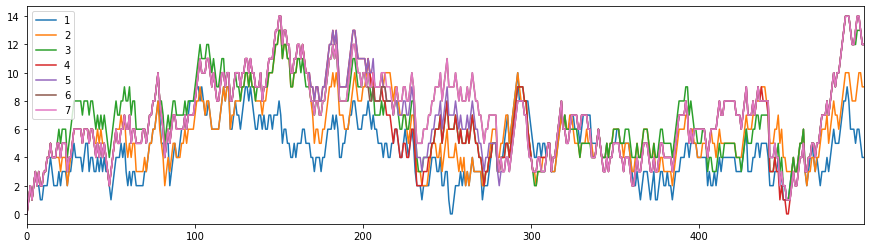

In [9]:
df = pd.DataFrame.from_dict(data)
df.plot(figsize=[15,4])